## Download MNIST Dataset

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)

In [5]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [6]:
len(mnist['data'])

70000

## Visualization

In [7]:
X,y = mnist['data'], mnist['target']

In [8]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

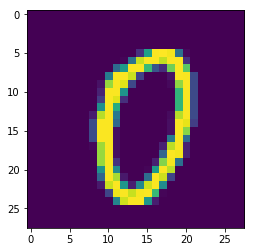

In [13]:
_ = X[1000]
_image = _.reshape(28,28)
plt.imshow(_image)

In [14]:
y[1000]

'0'

## Locating the Number 4

In [15]:
type(y)

numpy.ndarray

In [21]:
y == '4'

array([False, False,  True, ...,  True, False, False])

In [22]:
np.where(y=='4')

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

In [23]:
y[2]

'4'

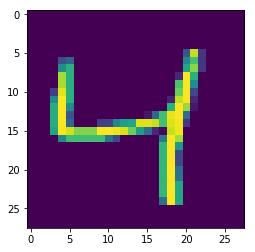

In [24]:
_ = X[2]
_image = _.reshape(28,28)
plt.imshow(_image)

## Splitting the Training and Test Sets

In [26]:
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

## Shuffle the Dataset

In [27]:
import numpy as np

In [28]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

To simplify convert problem to zero or non-zero

In [29]:
y_train_0 = (y_train == '0')

In [30]:
y_train_0

array([False, False, False, ..., False,  True, False])

In [31]:
y_test_0 = (y_test == '0')

In [32]:
y_test_0

array([False, False, False, ..., False, False, False])

# SGD Classifier

## Training

In [33]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction

In [36]:
clf.predict(X[1000].reshape(1,-1))

array([ True])

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## Stratified KFold

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state = 0)

In [40]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 100)

In [44]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_fold = y_train_0[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print('{0:.4f}'.format(n_correct / len(y_test_fold)))

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9852


C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9871


C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9859


## cross_val_score using K-fold Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

In [47]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring = 'accuracy')

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.98515074, 0.9871    , 0.98589929])

In [48]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring = 'accuracy')

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.98533578, 0.98433594, 0.98400267, 0.99      , 0.989     ,
       0.98633333, 0.98066667, 0.98933156, 0.97516253, 0.98999833])

## Danger of Blindly Applying Evaluator as a Performance Measure

In [49]:
1-sum(y_train_0) / len(y_train_0)

0.9012833333333333

# Confusion Matrix

In [50]:
from sklearn.model_selection import cross_val_predict

In [51]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_train_0, y_train_pred)

array([[53798,   279],
       [  558,  5365]], dtype=int64)

## Precision

In [55]:
from sklearn.metrics import precision_score, recall_score

In [57]:
precision_score(y_train_0, y_train_pred)

0.9505669737774628

In [58]:
5365 / (5365 + 279)

0.9505669737774628

## Recall

In [59]:
recall_score(y_train_0, y_train_pred)

0.9057909842984974

In [60]:
5365 / (5365 + 558)

0.9057909842984974

## F1 Score

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1_score(y_train_0, y_train_pred)

0.927638972940261

# Precision/Recall Tradeoff

In [63]:
clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [64]:
y[1000]

'0'

In [65]:
y_scores = clf.decision_function(X[1000].reshape(1,-1))
y_scores

array([82259.69992627])

In [66]:
threshold = 0

In [67]:
y_some_digits_pred = (y_scores > threshold)

In [68]:
y_some_digits_pred

array([ True])

In [69]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True])

In [70]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method = 'decision_function')

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

(array([1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 5.000e+00, 4.000e+00,
        5.000e+00, 1.100e+01, 1.300e+01, 1.000e+01, 9.000e+00, 3.100e+01,
        2.800e+01, 2.300e+01, 4.100e+01, 5.000e+01, 5.200e+01, 7.000e+01,
        8.300e+01, 7.100e+01, 1.100e+02, 1.460e+02, 1.700e+02, 1.640e+02,
        2.440e+02, 2.710e+02, 3.510e+02, 4.050e+02, 4.770e+02, 6.040e+02,
        7.000e+02, 7.870e+02, 8.710e+02, 1.045e+03, 1.143e+03, 1.330e+03,
        1.459e+03, 1.611e+03, 1.761e+03, 1.907e+03, 2.071e+03, 2.111e+03,
        2.213e+03, 2.178e+03, 2.344e+03, 2.500e+03, 2.374e+03, 2.245e+03,
        2.196e+03, 2.236e+03, 2.137e+03, 2.006e+03, 1.864e+03, 1.746e+03,
        1.528e+03, 1.276e+03, 1.111e+03, 9.840e+02, 7.440e+02, 5.950e+02,
        4.250e+02, 3.770e+02, 3.240e+02, 2.540e+02, 2.480e+02, 2.040e+02,
        2.280e+02, 2.490e+02, 2.870e+02, 3.230e+02, 3.820e+02, 4.400e+02,
        4.200e+02, 3.990e+02, 4.160e+02, 3.720e+02, 3.390e+02, 2.980e+02,
        2.160e+02, 2.050e+02, 1.680e+0

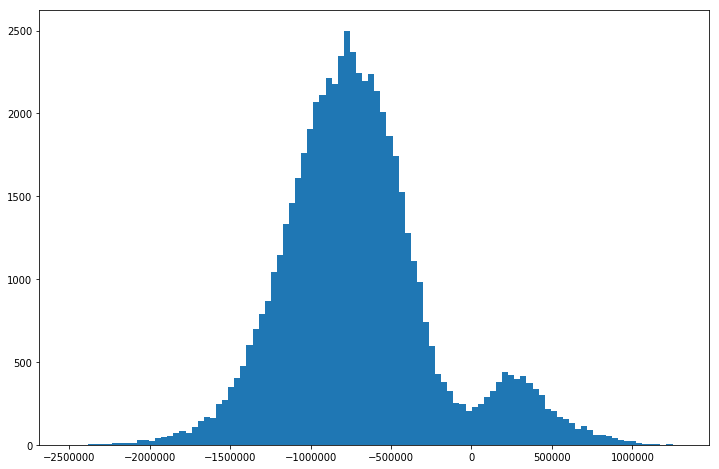

In [71]:
plt.figure(figsize = (12,8))
plt.hist(y_scores, bins=100)

In [72]:
from sklearn.metrics import precision_recall_curve

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [76]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'Recall')
    plt.xlabel('Thresholds')
    plt.legend(loc = 'upper left')
    plt.ylim([-0.5, 1.5])

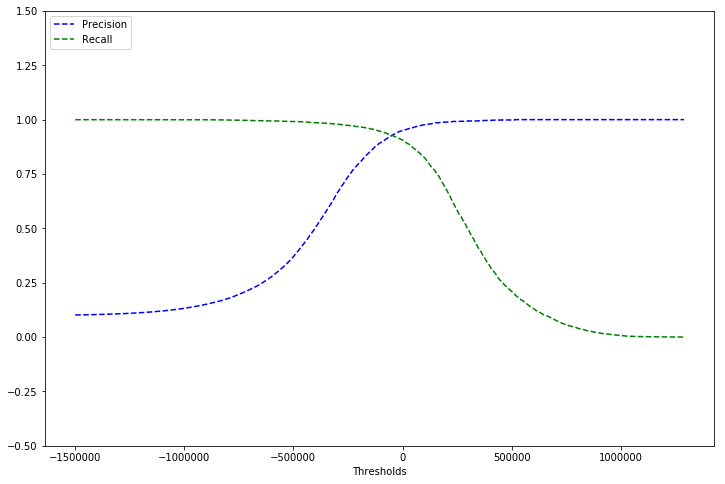

In [77]:
plt.figure(figsize = (12,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0.5, 1.0, 'PR Curve: precisions/recalls tradeoff')

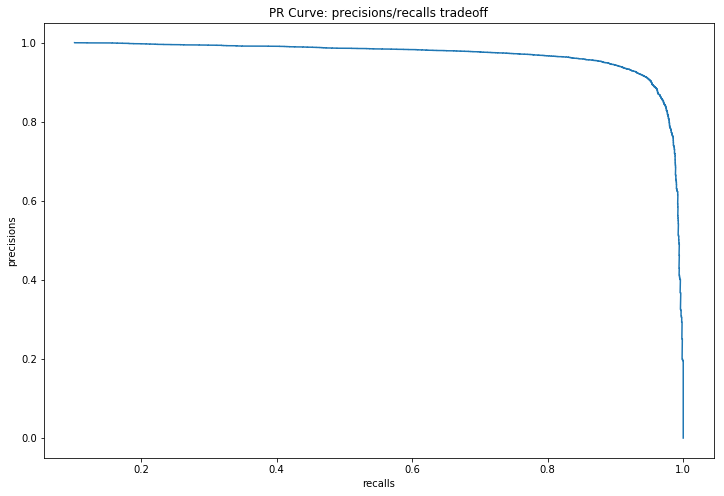

In [78]:
plt.figure(figsize = (12,8))
plt.plot(precisions, recalls)
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('PR Curve: precisions/recalls tradeoff')

# Setting High Precisions

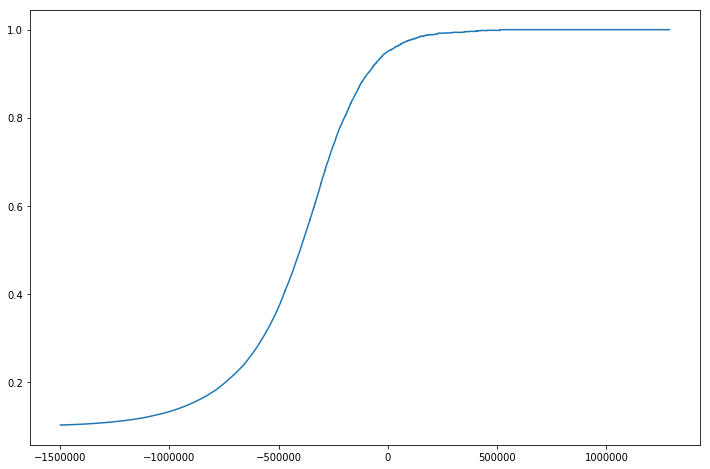

In [79]:
plt.figure(figsize=(12,8))
plt.plot(thresholds, precisions[1:])

In [80]:
idx = len(precisions[precisions < 0.9])

In [81]:
thresholds[idx]

-92353.53876391421

In [82]:
y_train_pred_90 = (y_scores > -92353)

In [83]:
precision_score(y_train_0, y_train_pred_90)

0.9000805801772764

In [84]:
recall_score(y_train_0, y_train_pred_90)

0.9429343238223873

In [85]:
idx = len(precisions[precisions < 0.99])

In [86]:
thresholds[idx]

221748.5737369428

In [87]:
y_train_pred_99 = (y_scores > thresholds[idx])

In [88]:
precision_score(y_train_0, y_train_pred_99)

0.9900314795383001

In [89]:
recall_score(y_train_0, y_train_pred_99)

0.6371771061961844

# Setting High Recalls

In [95]:
idx = len(recalls[recalls > 0.9])

In [96]:
thresholds[idx]

8562.9562558326

In [97]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [98]:
precision_score(y_train_0, y_train_pred_90)

0.9529685264663805

In [99]:
recall_score(y_train_0, y_train_pred_90)

0.8997129832854972

# Receiver Operating Characteristics (ROC) Curve

In [100]:
from sklearn.metrics import roc_curve

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [102]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

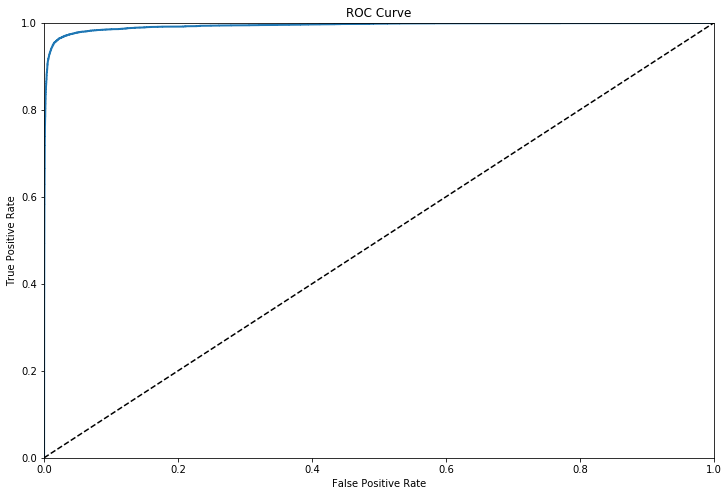

In [103]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_train_0, y_scores)

0.9935492337073736

Use PR Curve when **positive class is rare** or when you care more about false positives than false negatives

Use ROC Curve when **negative class is rare** or when you care more about false negatives than false positives

# Model Comparison

## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
f_clf = RandomForestClassifier(random_state = 0)

In [109]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0, cv=3, method='predict_proba')

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [110]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

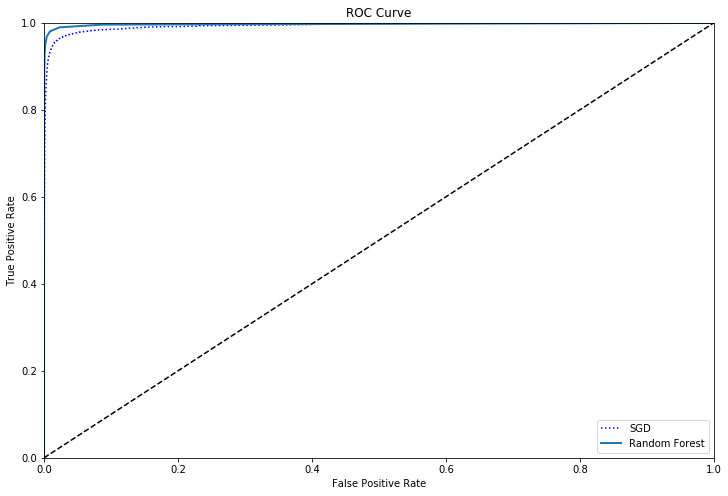

In [112]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc = 'lower right')
plt.show()

In [114]:
roc_auc_score(y_train_0, y_scores_forest)

0.9971921217096559

In [115]:
f_clf.fit(X_train, y_train_0)

C:\Users\Drake\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [118]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [119]:
precision_score(y_train_0, y_train_rf)

0.9924160346695557

In [120]:
recall_score(y_train_0, y_train_rf)

0.9279081546513591

In [121]:
confusion_matrix(y_train_0, y_train_rf)

array([[54035,    42],
       [  427,  5496]], dtype=int64)